# Econometrics Project
## Done by: CHAHROUR Hussein and NAKAD Elie
## Prepared for: Pr. Patrick Waelbroeck

# <font color="#ff0000">Part 1 -  Régression</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import f
import statsmodels.api as sm

In [2]:
path=r'MROZ.txt'
df=pd.read_csv(path, delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,.,0.00,3020,43,...,28200,0.6215,10,10,9.5,1,5,28.200000,.,25
749,0,0,2,3,31,12,.,0.00,2056,33,...,10000,0.7715,12,12,7.5,0,14,10.000000,.,196
750,0,0,0,0,43,12,.,0.00,2383,43,...,9952,0.7515,10,3,7.5,0,4,9.952000,.,16
751,0,0,0,0,60,12,.,0.00,1705,55,...,24984,0.6215,12,12,14.0,1,15,24.984000,.,225


In [3]:
import warnings
warnings.filterwarnings('ignore')

## Question 1

In [4]:
df=df.loc[df[6]!='.']
df[6]=df[6].astype(float)
df=df.loc[df[6]>0]
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


## Question 2

In [5]:

kidslt6=df[2]
kidsgt6=df[3]
age=df[4]
educ=df[5]
wage=df[6]
huswage=df[11]
df2=df.rename(columns={2:"kidslt6",3:"kidsgt6",4:"age",5:"educ",6:"wage",11:"huswage"});

In [6]:
#L’ensemble des femmes
df2[['wage','age','educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [7]:
#Les femmes dont le salaire du mari est supérieur à la médiane de l’échantillon
df2['huswage']=df2['huswage'].astype(float)
Husb_income=np.sort(df2['huswage'])
mediane_income=Husb_income[int(len(Husb_income)/2)]
df2[df2['huswage'] >= mediane_income][['wage','age','educ',]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,4.896822,42.275701,13.242991
std,4.041606,7.388843,2.359045
min,0.161600,30.000000,5.000000
25%,2.513850,36.000000,12.000000
50%,3.846400,43.000000,12.000000
75%,5.854125,48.000000,16.000000
max,25.000000,59.000000,17.000000


In [8]:
#les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon
df2[df2['huswage'] < mediane_income][['wage','age','educ']].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,3.458541,41.668224,12.074766
std,2.143274,8.045482,2.054200
min,0.128200,30.000000,6.000000
25%,2.117275,35.000000,12.000000
50%,2.971800,41.000000,12.000000
75%,4.393800,47.000000,12.000000
max,18.267000,60.000000,17.000000


## Question 3

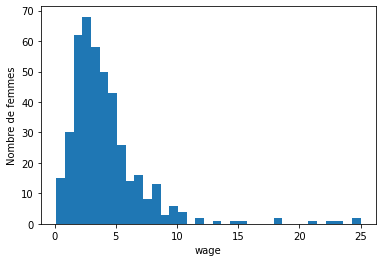

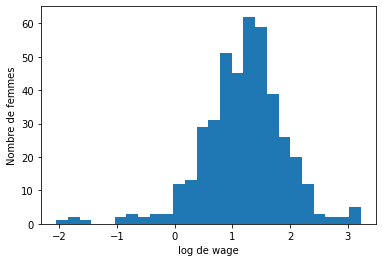

In [9]:
plt.figure(1)
plt.xlabel("wage")
plt.ylabel("Nombre de femmes")
plt.hist(wage, 'auto')

plt.figure(2)
plt.xlabel("log de wage")
plt.ylabel("Nombre de femmes")
plt.hist(np.log(wage), 'auto');

## Question 4

In [10]:
motheduc=df[14]
fatheduc=df[15]
corr=np.corrcoef(motheduc,fatheduc)
print("Correlation entre education du père et celle de la mère est: ",corr[0][1])


Correlation entre education du père et celle de la mère est:  0.5540632184311678


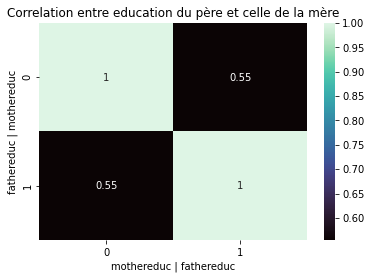

In [11]:
sns.heatmap(corr,annot=True,cmap="mako")
plt.xlabel('mothereduc | fathereduc')
plt.ylabel('fathereduc | mothereduc')
plt.title('Correlation entre education du père et celle de la mère')
plt.show()

# Correlation est de 0.554 plus grand que 0.5 --> Motheduc et Fatheduc sont en correlation 
# on ne doit pas les utiliser tous les deux comme variables explicatives

## Question 5

Correlation entre le salaire et le niveau d'éducation est:  0.3419544341781356


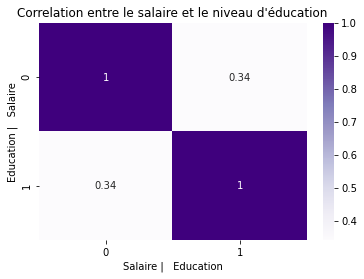

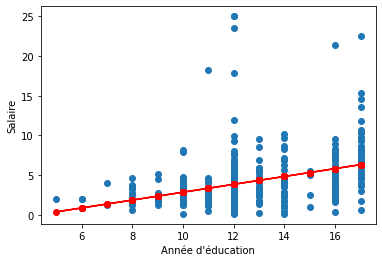

--------------------------------------------------------------------
Correlation entre le salaire et l'éxpérience est:  0.05499149636893512


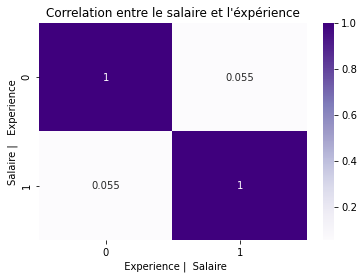

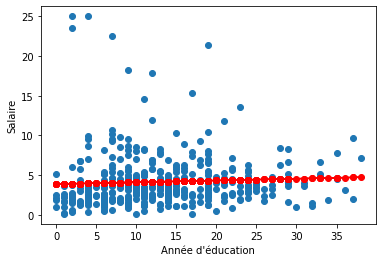

--------------------------------------------------------------------
Correlation entre le salaire et l'éducation du père est:  0.10773624582184282


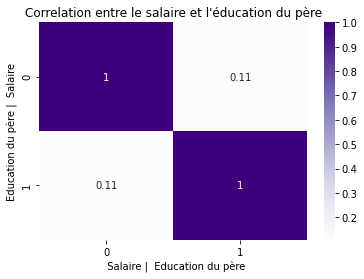

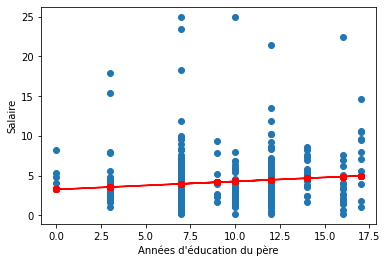

In [12]:
exper=df[18]

corr=np.corrcoef(wage,educ)
print("Correlation entre le salaire et le niveau d'éducation est: ",corr[0][1])
sns.heatmap(corr,annot=True,cmap=plt.cm.Purples)
plt.xlabel('Salaire |   Education')
plt.ylabel('Education |   Salaire')
plt.title("Correlation entre le salaire et le niveau d'éducation")

fig, ax = plt.subplots()
plt.xlabel("Année d'éducation")
plt.ylabel('Salaire')

_ = ax.scatter(educ, wage)
s = np.polyfit(educ, wage, 1)
p = np.poly1d(s)
plt.plot(educ, p(educ), "r-o")
plt.show()
print("--------------------------------------------------------------------")

corr=np.corrcoef(exper,wage)
print("Correlation entre le salaire et l'éxpérience est: ",corr[0][1])
sns.heatmap(corr,annot=True,cmap=plt.cm.Purples)
plt.xlabel('  Experience |  Salaire')
plt.ylabel('Salaire |   Experience')
plt.title("Correlation entre le salaire et l'éxpérience")

fig, ax = plt.subplots()
plt.xlabel("Année d'éducation")
plt.ylabel('Salaire')
_ = ax.scatter(exper, wage)
s = np.polyfit(exper, wage, 1)
p = np.poly1d(s)
plt.plot(exper, p(exper), "r-o")
plt.show()
print("--------------------------------------------------------------------")

correlation=np.corrcoef(wage,fatheduc)
print("Correlation entre le salaire et l'éducation du père est: ",correlation[0][1])
sns.heatmap(correlation,annot=True,cmap=plt.cm.Purples)
plt.xlabel('  Salaire |  Education du père')
plt.ylabel('Education du père |  Salaire')
plt.title("Correlation entre le salaire et l'éducation du père")

fig, ax = plt.subplots()
plt.xlabel("Années d'éducation du père")
plt.ylabel('Salaire')
_ = ax.scatter(fatheduc, wage)
s = np.polyfit(fatheduc, wage, 1)
p = np.poly1d(s)
plt.plot(fatheduc, p(fatheduc), "r-o")

plt.show()

## Question 6
### The solution is in the report

## Question 7

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.41e-10
Time:                        13:19:29   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.0

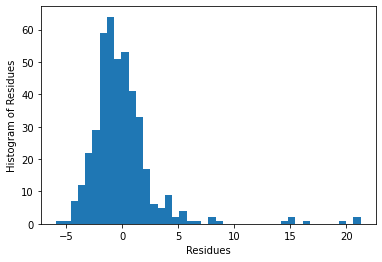

In [13]:
city=df[17]
nwifeinc=df[19]
k=np.shape(wage)
const=np.ones(k)

y=wage
X=np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())
u=results.resid
plt.xlabel("Residues")
plt.ylabel("Histogram of Residues")
plt.hist(u,bins='auto')
plt.show;

## Question 8

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.00e-13
Time:                        13:19:29   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

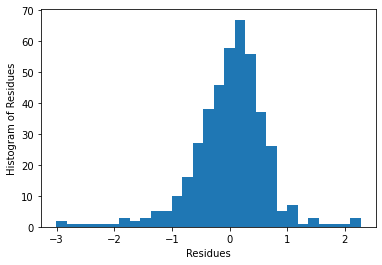

In [14]:
k=np.shape(wage)
const=np.ones(k)

y=np.log(wage)
X=np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsgt6))
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())
u=results.resid
plt.xlabel("Residues")
plt.ylabel("Histogram of Residues")
plt.hist(u,bins='auto')
plt.show;

## Question 9

In [15]:
beta = np.linalg.inv(X.T @ X)@X.T@y
u=y-X@beta
n,k=np.shape(X)
sig2=u.T@u/(n-k)
Var=sig2*np.linalg.inv(X.T @ X)
std=np.sqrt(np.diag(Var))
t_nwifeinc=(beta[4])/std[4]

thresholds_sig=[0.01,0.05,0.1]
for threshold_sig in thresholds_sig:
    print('threshold',round(threshold_sig*100),' %')
    print("critical threshold",t.ppf(1-threshold_sig,n-k))
    pvalue=2*(t.sf(t_nwifeinc,n-k))
    print("p value=",pvalue)
    print("student value",t_nwifeinc)
    if threshold_sig>pvalue:
        print  (threshold_sig,'>',round(pvalue,4), "we reject the hypothesis \n")
    else:
        print  (threshold_sig,'<',round(pvalue,4), "we accept the hypothesis \n")


threshold 1  %
critical threshold 2.3352378938061142
p value= 0.14340791214517742
student value 1.465951741624178
0.01 < 0.1434 we accept the hypothesis 

threshold 5  %
critical threshold 1.6484810571255268
p value= 0.14340791214517742
student value 1.465951741624178
0.05 < 0.1434 we accept the hypothesis 

threshold 10  %
critical threshold 1.2835656801791953
p value= 0.14340791214517742
student value 1.465951741624178
0.1 < 0.1434 we accept the hypothesis 



## Question 10

In [16]:
degree_free = X.shape[0] - 7
beta_nwifeinc = beta[4]
std_nwifeinc = std[4]
student_nwifeinc = (beta_nwifeinc - 0.01) / std_nwifeinc
print('t value',student_nwifeinc)
print('p-value '+str(2 * (1 - t.sf(student_nwifeinc, degree_free))))

#2.5% < p= 12.5% --> we accept the hypothesis

t value -1.5363887846744726
p-value 0.12519423515110772


## Question 11

In [17]:
X0 = X
u = u
SSR0 = u.T @ u
print('SSR0 = %f' % SSR0)
y = np.log(wage)
y = y - 0.01 * nwifeinc - 0.05 * city
s = np.shape(wage)
const = np.ones(s)
X = np.column_stack((const, educ, exper, kidslt6, kidsgt6))

model = sm.OLS(y, X)
results = model.fit()
u = results.resid
SSR1 = u.T @ u
print('SSR1 = %f' % SSR1)

n, k = np.shape(X0)
F = ((SSR1 - SSR0) / 2) / (SSR0 / (n - k))
print('F = %f' % F)
print('columns in X0',k)
fisher_pval = f.sf(F, 2, n - k)
print('p-value for fisher: %f\n' % fisher_pval)
print('We get p-value > 5% thus we accept the null hypothesis')


SSR0 = 188.589973
SSR1 = 189.787874
F = 1.337070
columns in X0 7
p-value for fisher: 0.263727

We get p-value > 5% thus we accept the null hypothesis


## Question 12

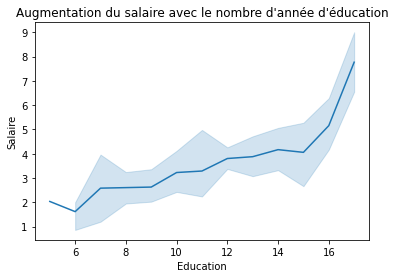

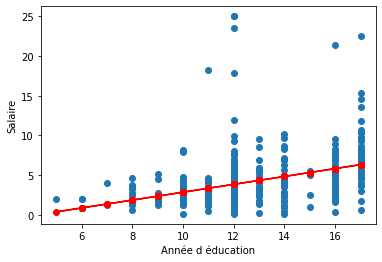

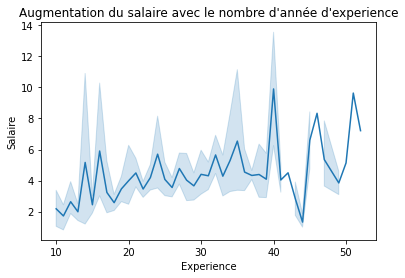

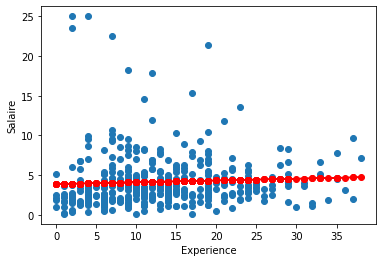

In [18]:
new=np.column_stack((wage,educ,exper))
sns.lineplot(educ,wage)
plt.xlabel("Education")
plt.ylabel("Salaire")
plt.title("Augmentation du salaire avec le nombre d'année d'éducation")
plt.show()

fig, ax = plt.subplots()
plt.xlabel('Année d éducation')
plt.ylabel('Salaire')

_ = ax.scatter(educ, wage)
z = np.polyfit(educ, wage, 1)
p = np.poly1d(z)
plt.plot(educ, p(educ), "r-o")
plt.show()

sns.lineplot(exper+educ,wage)
plt.xlabel("Experience")
plt.ylabel("Salaire")
plt.title("Augmentation du salaire avec le nombre d'année d'experience")
plt.show()


fig, ax = plt.subplots()
plt.xlabel('Experience')
plt.ylabel('Salaire')
_ = ax.scatter(exper, wage)
z = np.polyfit(exper, wage, 1)
p = np.poly1d(z)
plt.plot(exper, p(exper), "r-o")
plt.show()

## Question 13

In [19]:
y = np.log(wage)
s = np.shape(wage)
const = np.ones(s)
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidslt6 + kidsgt6))

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print('We get p-value: %f, > 0.05 we accept the hypothesis' % (results.pvalues[5]))

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.00e-13
Time:                        13:19:31   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

## Question 14

In [20]:
y = wage
s = np.shape(wage)
const = np.ones(s)
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

model = sm.OLS(y, X)
results = model.fit()
u = results.resid
u2 = u ** 2
y = u2
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.593
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.148
Time:                        13:19:31   Log-Likelihood:                -2207.4
No. Observations:                 428   AIC:                             4429.
Df Residuals:                     421   BIC:                             4457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4856     13.111      0.113      0.9

## Question 15

In [21]:
X = sm.add_constant(df[[17, 5, 18, 19, 2, 3]])
y = np.log(df[6])
n, p = X.shape

model = sm.OLS(y, X)
results = model.fit()

SSE_c = np.sum(results.resid**2)

X = sm.add_constant(df.loc[df[4] <= 43, [17, 5, 18, 19, 2, 3]])
y = np.log(df.loc[df[4] <= 43, 6])

model = sm.OLS(y, X, hasconst=True)
results = model.fit()

SSE1 = np.sum(results.resid**2)

X = sm.add_constant(df.loc[df[4] > 43, [17, 5, 18, 19, 2, 3]])
y = np.log(df.loc[df[4] > 43, 6])

model = sm.OLS(y, X, hasconst=True)
results = model.fit()

SSE2 = np.sum(results.resid**2)
f_stat = ((SSE_c-(SSE1+SSE2)) / p)  / ((SSE1+SSE2)/(n-2*p))
p_value = f.sf(f_stat, p, n-2*p)       

print("f-stat: "+str(f_stat))
print("p-value: "+str(p_value))

f-stat: 0.8260377871071876
p-value: 0.5660361961109925


## Question 16

In [22]:
X = sm.add_constant(df[[5, 18]])
y = np.log(df[6])
n, p = X.shape

model = sm.OLS(y, X)
results = model.fit()

SSR_c = np.sum(results.resid**2)
print("SSR_c pour le modele sans separation en fonction de l'age est: ",SSR_c)

SSR_c pour le modele sans separation en fonction de l'age est:  190.19498274773724


In [23]:
X = sm.add_constant(df.loc[df[4] < 43, [5, 18]])
y = df.loc[df[4] < 43]
y1 = np.log(df[6])
y.insert(1,"lwage",y1)
y =y.loc[df[4] < 43, 'lwage']

model = sm.OLS(y, X, hasconst=True)
results = model.fit()

SSR1 = np.sum(results.resid**2)
print('SSR1 pour le modele pour les femmess ayant moins que 43 ans est: ',SSR1)

SSR1 pour le modele pour les femmess ayant moins que 43 ans est:  105.48833027982494


In [24]:
X = sm.add_constant(df.loc[df[4] >= 43, [5, 18]])
y = df.loc[df[4] >= 43]
y1 = np.log(df[6])
y.insert(1,"lwage",y1)
y =y.loc[df[4] >= 43, 'lwage']

model = sm.OLS(y, X, hasconst=True)
results = model.fit()

SSR2 = np.sum(results.resid**2)
print('SSR2 pour le modele pour les femmes ayant plus que 43 ans est: ',SSR2)

SSR2 pour le modele pour les femmes ayant plus que 43 ans est:  81.98006667450232


In [25]:
f_stat = ((SSR_c-(SSR1+SSR2)) / p)  / ((SSR1+SSR2)/(n-2*p))
p_value = f.sf(f_stat, p, n-2*p)   

print('f_stat is ',f_stat,'and p_value is ',p_value)  


f_stat is  2.045890086920155 and p_value is  0.10681389474947503


# <font color="#ff0000">Part 2 - Séries temporelles</font>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import statsmodels.graphics.tsaplots as st
import statsmodels.tsa as stat
import statsmodels.api as sm
from scipy.stats import f as fdist

## Question 1

In [27]:
path= r'quarterly.xls'
data = pd.read_excel(path)
data

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      212 non-null    object 
 1   FFR       212 non-null    float64
 2   Tbill     212 non-null    float64
 3   Tb1yr     212 non-null    float64
 4   r5        212 non-null    float64
 5   r10       212 non-null    float64
 6   PPINSA    212 non-null    float64
 7   Finished  212 non-null    float64
 8   CPI       212 non-null    float64
 9   CPICORE   212 non-null    float64
 10  M1NSA     212 non-null    float64
 11  M2SA      212 non-null    float64
 12  M2NSA     212 non-null    float64
 13  Unemp     212 non-null    float64
 14  IndProd   212 non-null    float64
 15  RGDP      212 non-null    float64
 16  Potent    212 non-null    float64
 17  Deflator  212 non-null    float64
 18  Curr      212 non-null    float64
dtypes: float64(18), object(1)
memory usage: 31.6+ KB


In [29]:
pd.isna(data).sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

## Question 2

By definition $ Inf_{i} = 100. \frac{CPI_{i+1}-CPI_{i}}{CPI_{i}} $

In [30]:
data['INF']= 100*data['CPI'].diff()/data['CPI']

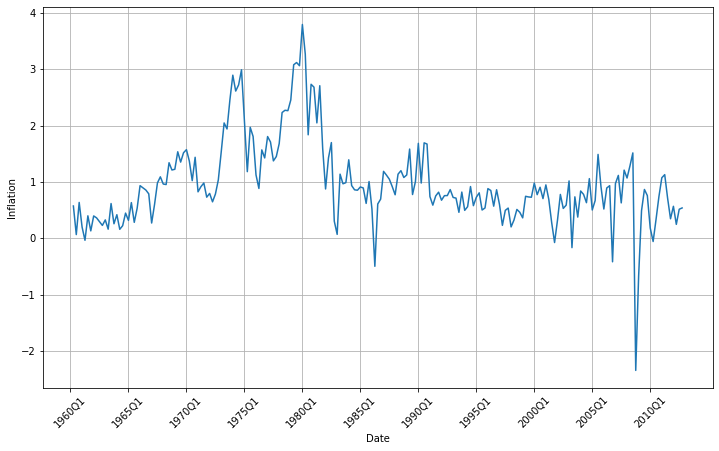

In [31]:
_, ax = plt.subplots(figsize=(12, 7))
freq=20
ax.plot(data.DATE, data['INF'], label="Inflation")
ticks= [i * freq for i in range(int(len(data.index)/freq)+1)]
plt.xticks(ticks,labels=data['DATE'].iloc[::freq],rotation=45)
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.grid()
plt.show()

## Question 3

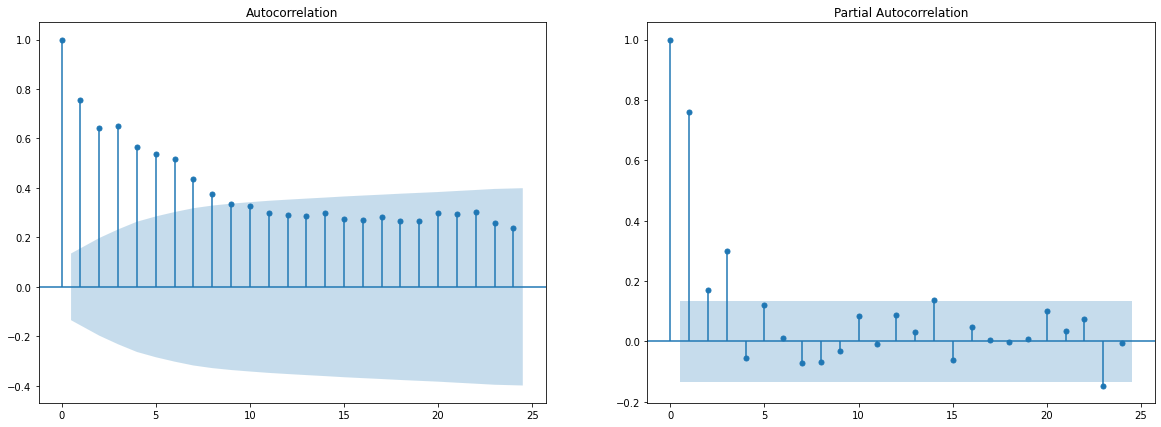

In [32]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 7))
st.plot_acf(data['INF'][1:], ax=ax0)
st.plot_pacf(data['INF'][1:], ax=ax1)
plt.show()

## Question 4
### Solution detailed in the Report

## Question 5

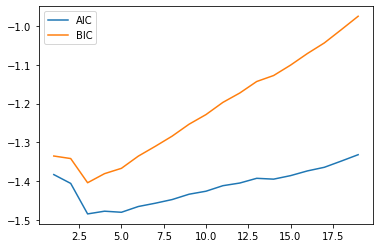

lag optimal according to the BIC criterion: 3
lag optimal according to the AIC criterion: 3


In [33]:
aic = []
bic = []

for lag in range(1, 20):
    model = stat.ar_model.AutoReg(data['INF'][1:].values, lags=lag).fit()
    
    aic.append(model.aic)
    bic.append(model.bic)


plt.plot(range(1, 20), aic, label="AIC")
plt.plot(range(1, 20), bic, label='BIC')
plt.legend()
plt.show()

print(f"lag optimal according to the BIC criterion: {np.argmin(bic) + 1}")
print(f"lag optimal according to the AIC criterion: {np.argmin(aic) + 1}")

## Question 6

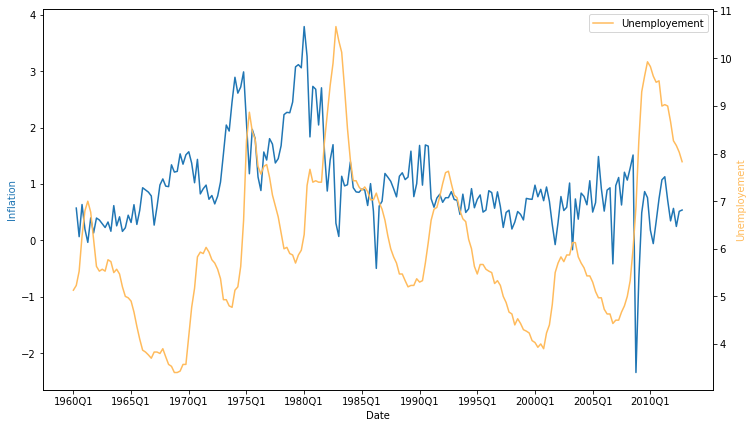

In [34]:
figure,ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()
freq=20
ax2.plot(data.DATE, data.Unemp, label = "Unemployement",color='#ffbb5c')
ax1.plot(data.DATE, data.INF, label = "Inflation", color='#2076b4')
ticks= [i * freq for i in range(int(len(data.index)/freq)+1)]
plt.xticks(ticks,labels=data['DATE'].iloc[::freq],rotation=45)
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation',color='#2076b4')
ax2.set_ylabel('Unemployement',color='#ffbb5c' )
plt.legend(loc=0)

plt.show()

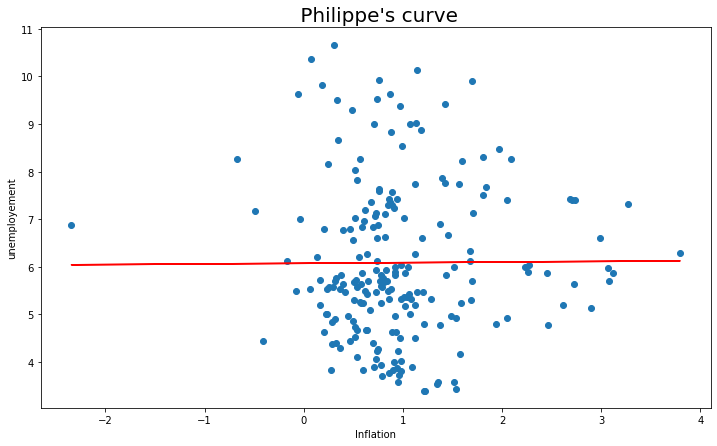

In [35]:
plt.figure(figsize=(12, 7))

plt.scatter(data.INF,data.Unemp)
plt.xlabel("Inflation")
plt.ylabel("unemployement")
plt.title(" Philippe's curve",fontsize=20)
fiit = np.polyfit(data.INF[1:], data.Unemp[1:], 1)
line = np.poly1d(fiit)
plt.plot(data.INF[1:],line(data.INF[1:]), "r-")
plt.show()

In [36]:
X = sm.add_constant(data.INF[1:])
y = data.Unemp[1:]

model = sm.OLS(y, X)
results = model.fit()
residual = results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.008229
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.928
Time:                        13:19:32   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0735      0.182     33.388      0.0

## Question 7

In [37]:
from statsmodels.stats.stattools import durbin_watson
model = sm.OLS(residual[1:], residual.shift(1)[1:])
results = model.fit()
print("Durbibn Watson: ",durbin_watson(residual))
print("\n-------------------------------------------\n")
print(results.summary())

Durbibn Watson:  0.04411869153477157

-------------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4565.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                   5.77e-144
Time:                        13:19:32   Log-Likelihood:                         -70.233
No. Observations:                 210   AIC:                                      142.5
Df Residuals:                     209   BIC:                                      145.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err     

## Question 8

In [38]:
rho=results.params[0]
unemp=data.Unemp[1:]-rho*data.Unemp[:-1]
inf=data.INF[1:]-rho*data.INF[:-1]
inf= inf.dropna()
unemp= unemp.dropna()

X = sm.add_constant(inf)
y = unemp
model = sm.OLS(y, X)
results = model.fit()
residual = results.resid
print(results.summary())

model1 = sm.OLS(residual[1:], residual.shift(1)[1:])
results1 = model1.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01777
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.894
Time:                        13:19:32   Log-Likelihood:                 422.77
No. Observations:                 210   AIC:                            -841.5
Df Residuals:                     208   BIC:                            -834.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1214      0.004     33.233      0.0

## Question 9

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7061
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.403
Time:                        13:19:32   Log-Likelihood:                -204.20
No. Observations:                 105   AIC:                             412.4
Df Residuals:                     103   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9353      0.290     20.477      0.0

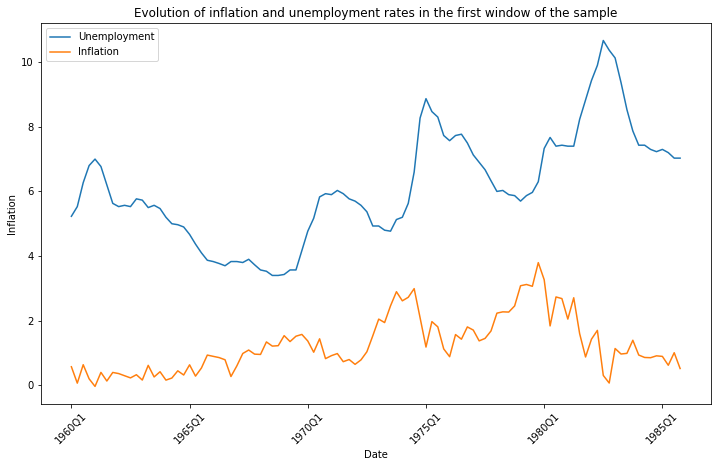

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.285
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0728
Time:                        13:19:33   Log-Likelihood:                -193.37
No. Observations:                 106   AIC:                             390.7
Df Residuals:                     104   BIC:                             396.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4223      0.258     24.925      0.0

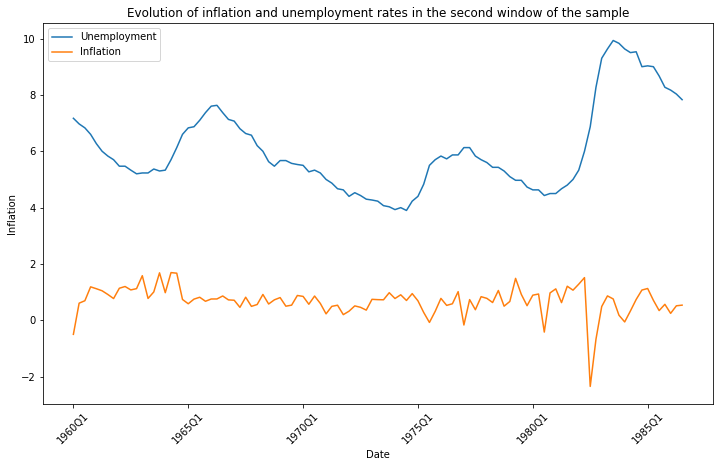

In [39]:
X = sm.add_constant(data.INF[1:])
y = data.Unemp[1:] 
n, p = X.shape
indice = n // 2

# regression for the 1st division 

X1 = X[:indice] 
y1 = y[:indice] 

model1 = sm.OLS(y1, X1)
results1 = model1.fit()
residual1 = results1.resid
SSE_c1 = np.sum(results1.resid**2)

print(results1.summary())

plt.figure(figsize=(12, 7))
freq=20
ticks= [i * freq for i in range(int(len(data.index)/freq)+1)]
plt.xticks(ticks,labels=data['DATE'].iloc[::freq],rotation=45)

plt.plot(data["DATE"][1:indice],data.Unemp[1:indice], label= "Unemployment")
plt.plot(data["DATE"][1:indice],data.INF[1:indice],label="Inflation")

plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title("Evolution of inflation and unemployment rates in the first window of the sample")
plt.legend()
plt.show()

# regression for the 2nd division

X2 = X[indice:] 
y2 = y[indice:]

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
residual2 = results2.resid
SSE_c2 = np.sum(results2.resid**2)

print(results2.summary())

plt.figure(figsize=(12, 7))
freq=20
ticks= [i * freq for i in range(int(len(data.index)/freq)+1)]
plt.xticks(ticks,labels=data['DATE'].iloc[::freq],rotation=45)

plt.plot(data["DATE"][indice:],data.Unemp[indice:], label= "Unemployment")
plt.plot(data["DATE"][indice:],data.INF[indice:],label="Inflation")

plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title("Evolution of inflation and unemployment rates in the second window of the sample")
plt.legend()
plt.show()

## Question 10

In [40]:
X = pd.concat([pd.concat([data.INF[1:].reset_index(drop=True).shift(i) for i in range(1, 5)], axis=1), pd.concat([data.Unemp[1:].reset_index(drop=True).shift(i) for i in range(1, 5)], axis=1)], axis=1)
new_name = []
for i, name in enumerate(X.columns):
    new_name.append(name + '_' + str((i%4+1)))
 
X.columns = new_name 
X = X[4:]
X = sm.add_constant(X)
X.head(2)

,const,INF_1,INF_2,INF_3,INF_4,Unemp_1,Unemp_2,Unemp_3,Unemp_4
4,1.0,0.201072,0.638012,0.067590,0.574907,6.8,6.27,5.53,5.23
5,1.0,-0.033523,0.201072,0.638012,0.067590,7.0,6.80,6.27,5.53


In [41]:
# regression with all variables 
y = data.Unemp[5:]
n, p = X.shape

model = sm.OLS(y.values.reshape(-1,1), X)
results = model.fit()
residual = results.resid
SSE = np.sum(residual**2)

print(results.summary())

# regression without Unemp variable (beta_Unemp_i = 0 in the f-test) 

X1 = sm.add_constant(X.iloc[:, 5:])
y =data.Unemp[5:]

model = sm.OLS(y.values.reshape(-1,1), X1)
results1 = model.fit()
residual1 = results1.resid
SSE1 = np.sum(residual1**2)

print(results1.summary())

# Compute Fisher Stat 

f_static = ((SSE1 - SSE) / 4)  /  (SSE / (n - 4))
p_value = fdist.sf(f_static, 4, n - 4)

results_fisher = pd.DataFrame({"f-stat": f_static, "p-value": p_value}, index=["results"])
            
print(results_fisher)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1143.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          3.10e-161
Time:                        13:19:33   Log-Likelihood:                 4.5455
No. Observations:                 207   AIC:                             8.909
Df Residuals:                     198   BIC:                             38.90
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1454      0.072      2.007      0.0

## Question 11

0.09497687398547783

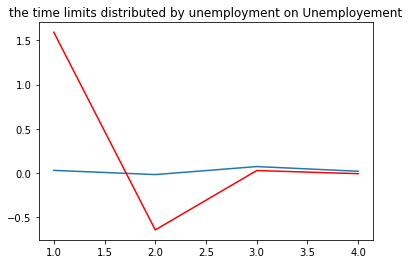

In [42]:
inflag=results.params[1:5]
plt.plot([1,2,3,4],inflag)
plt.title("delays distributed from inflation on Unemployement")

chomlag=results.params[5:]
plt.plot([1,2,3,4],chomlag,c='r')
plt.title("the time limits distributed by unemployment on Unemployement")

#the long term effect of inflation on unemployment is given by the sum of the parameters of the model 
effect=results.params[1:5].sum()
effect

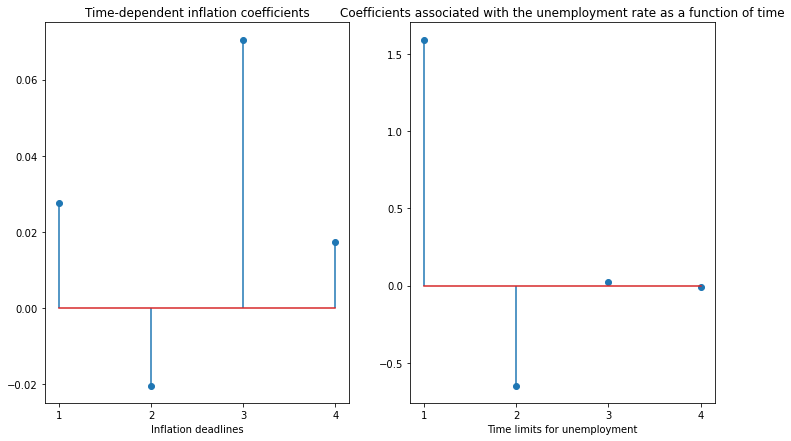

Sum of coefficients associated with inflation: 0.095


In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

inflag = results.params[1:5]    
ax[0].stem(range(1, 5), inflag , use_line_collection=True)
ax[0].set_title("Time-dependent inflation coefficients")
ax[0].set_xlabel("Inflation deadlines")
ax[0].set_xticks(range(1, 5))

chomlag= results.params[5:]
ax[1].stem(range(1, 5), chomlag, use_line_collection=True)
ax[1].set_title("Coefficients associated with the unemployment rate as a function of time")
ax[1].set_xlabel("Time limits for unemployment")
ax[1].set_xticks(range(1, 5))

plt.show()

print("Sum of coefficients associated with inflation: {0:0.3f}".format(np.sum(results.params[1:5])))

